# NOTEBOOK PROYECTO REGRESIÓN LINEAL COSTE SEGURO MÉDICO

OBJETIVO: Predecir el coste del seguro médico de una persona

# PRIMERA PARTE - EDA 

## O. INCLUYO DATOS

In [33]:
#importo librerias
import pandas as pdpip 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
import json


##### IMPRIMO VISTA PREVIA INICIAL DE LOS DATOS

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Exploración y limpieza

In [2]:
def explore_data(df):
    df.info()
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
def explore_data(df):
    df.info()
    print(df.shape)
    return df

In [4]:
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1.1) Quito los valores duplicados

In [5]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### 1.2 Eliminar información innecesaria

In [6]:
import pandas as pd
columns_to_drop = []
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

## 2. Análisis de variables Univariadas

### 2.1 Varbiables categóricas

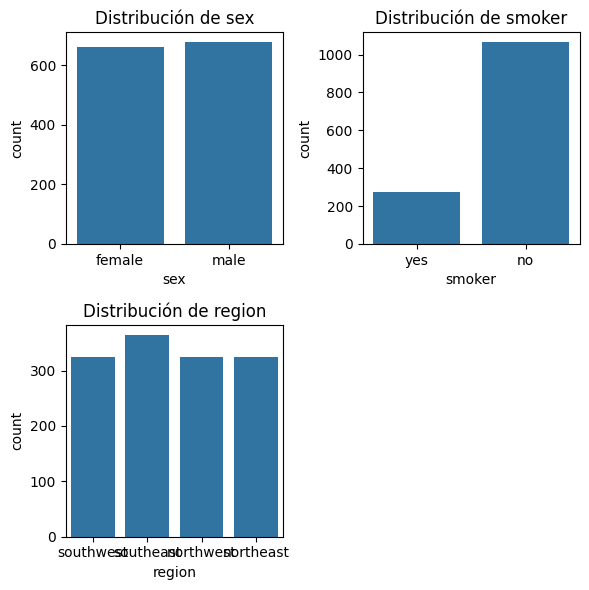

In [7]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    print("No hay columnas categóricas en los datos analizados para generar gráficos de ningún tipo.")  
else:
    num_categorical = len(categorical_cols)
    num_rows = (num_categorical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 3 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
    for i in range(num_categorical, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

CONCLUSIONES: 1) el sexo está muy equipado en cuanto a reparto 2) hay muchos más no fumadores que gente que fuma 3) la región donde más gente hay es la segunda barra del gráfico.

### 2.2 Variables Numéricas

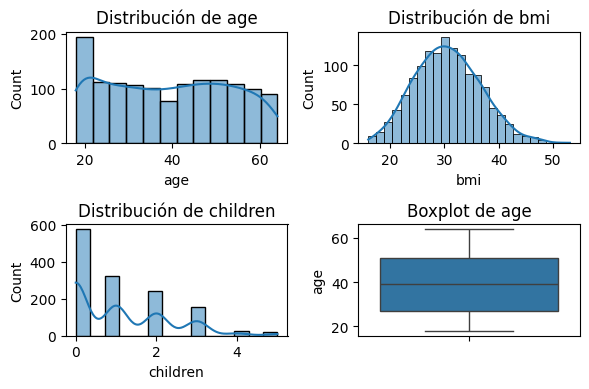

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
def univariate_numerical_analysis(df, target_column):
    """2.2 Análisis de variables numéricas."""
    if df[target_column].dtype == 'object':
        df[target_column + '_n'] = pd.factorize(df[target_column])[0]
        transformation_rules = {row[target_column]: row[target_column + '_n'] for _, row in df[[target_column, target_column + '_n']].drop_duplicates().iterrows()}
        ruta_json = os.path.join("../data/processed/Json", f"{target_column}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True)
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        target_column = target_column + '_n'
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_numerical = len(numerical_cols)
    num_rows = (num_numerical + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6, 2 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.histplot(x=col, data=df, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')
        if i + num_numerical < len(axes):
            sns.boxplot(y=col, data=df, ax=axes[i + num_numerical])
            axes[i + num_numerical].set_title(f'Boxplot de {col}')
    for i in range(num_numerical * 2, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
target_column = 'charges'
univariate_numerical_analysis(df, target_column)

Conclusiones:



Edad (age):

La mayoría de las personas tienen edades entre 20 y 60 años.
La mediana de la edad está alrededor de los 40 años.
Índice de Masa Corporal (bmi):

La mayoría de los valores de bmi están entre 20 y 40.
La mediana del bmi está alrededor de 30.
Número de Hijos (children):

La mayoría de las personas tienen entre 0 y 2 hijos.
La mediana del número de hijos está en 1 hijo.
Costos Médicos (charges):

La mayoría de los costos médicos están entre 0 y 20,000.
La mediana de los costos médicos está alrededor de 10,000.

## 3. Análisis de variables multivariante

### 3.1 Numérico-numérico

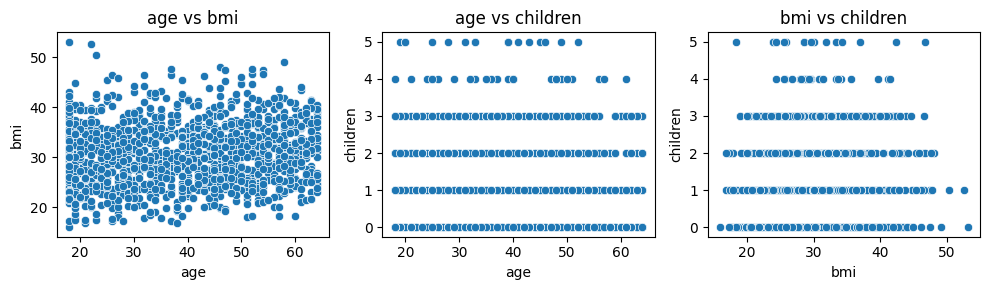

In [9]:
def bivariate_numerical_analysis(df):
    """3.1 Análisis numérico-numérico."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    if len(numerical_cols) > 1:
        num_plots = len(numerical_cols) * (len(numerical_cols) - 1) // 2
        cols = 3
        rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
        axes = axes.flatten()
        plot_index = 0
        for i in range(len(numerical_cols)):
            for j in range(i + 1, len(numerical_cols)):
                ax = axes[plot_index]
                sns.scatterplot(x=numerical_cols[i], y=numerical_cols[j], data=df, ax=ax)
                ax.set_title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
                plot_index += 1
        for k in range(plot_index, len(axes)):
            fig.delaxes(axes[k])
        plt.tight_layout()
        plt.show()
bivariate_numerical_analysis(df)

CONLCUSIONES

- Relación entre age y charges: Observando el gráfico de dispersión entre age y charges, se puede concluir que a medida que aumenta la edad, los costos médicos tienden a ser mayores. Esto sugiere que las personas mayores pueden necesitar más atención médica, lo que incrementa sus gastos.
- Relación entre bmi y charges: Si el gráfico muestra una correlación positiva entre el índice de masa corporal (bmi) y los costos médicos (charges), se puede concluir que un mayor índice de masa corporal está asociado con mayores costos médicos. Esto podría indicar que las personas con un mayor bmi tienen más problemas de salud que requieren atención médica.
- Relación entre children y charges: Si no hay una relación clara entre el número de hijos (children) y los costos médicos (charges), se puede concluir que el número de hijos no tiene un impacto significativo en los costos médicos.
- Relación entre bmi y age: Si los gráficos de dispersión muestran que no hay una relación clara entre bmi y age, se puede concluir que el índice de masa corporal no varía significativamente con la edad.
- Identificación de outliers: Si se observan puntos que se alejan significativamente del resto de los datos en cualquier gráfico de dispersión, estos puntos pueden ser identificados como outliers. Por ejemplo, si hay individuos con costos médicos (charges) extremadamente altos, se podría investigar más para entender las razones detrás de estos costos elevados.

### 3.2 Categótico-categórico

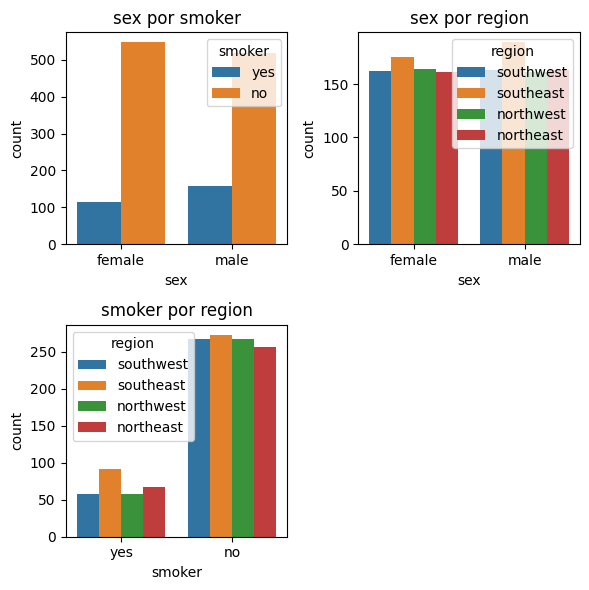

In [10]:
def bivariate_categorical_analysis(df):
    """Análisis bivariante de variables categóricas."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) < 2:
        print("No hay suficientes columnas categóricas en el DataFrame para realizar un análisis bivariante.")
        return
    from itertools import combinations
    categorical_pairs = list(combinations(categorical_cols, 2))
    num_pairs = len(categorical_pairs)
    num_rows = (num_pairs + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(6,3 * num_rows))
    axes = axes.flatten()
    for i, (col1, col2) in enumerate(categorical_pairs):
        sns.countplot(x=col1, hue=col2, data=df, ax=axes[i])
        axes[i].set_title(f'{col1} por {col2}')
    for i in range(num_pairs, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()
bivariate_categorical_analysis(df)

Conclusiones: 1)Relación entre sex y smoker:Los gráficos muestran la distribución de fumadores y no fumadores por sexo. Si hay más hombres que mujeres fumadores, podrías concluir que el hábito de fumar es más común entre los hombres en este conjunto de datos.
2) Relación entre region y smoker:Los gráficos muestran la distribución de fumadores y no fumadores por región. Si una región tiene una mayor proporción de fumadores, podrías concluir que esa región tiene una mayor prevalencia de tabaquismo.
3) Relación entre sex y region: Los gráficos muestran la distribución de hombres y mujeres por región. Si hay una región con una mayor proporción de un sexo, podrías concluir que esa región tiene una distribución de género particular.
4) Relación entre region y children: Los gráficos muestran la distribución del número de hijos por región. Si una región tiene una mayor proporción de familias con más hijos, podrías concluir que esa región tiene una tendencia a tener familias más grandes.

### 3.3 Combinaciones de la clase con varias predictoras

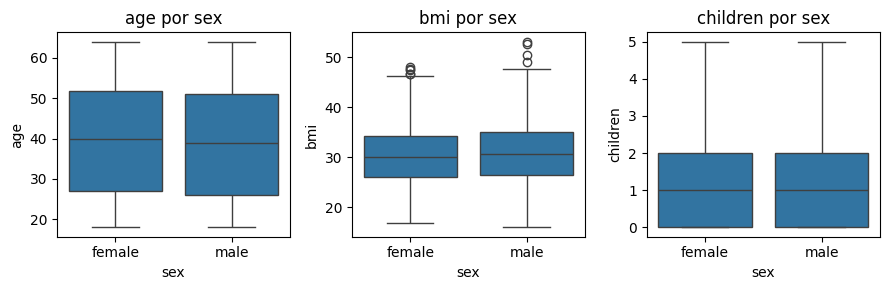

In [11]:
def class_predictor_analysis(df):
    """3.3 Combinaciones de la clase con varias predictoras."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        categorical_col = categorical_cols[0]
        cols = 3
        rows = len(numerical_cols) // cols + (1 if len(numerical_cols) % cols != 0 else 0)
        fig, axes = plt.subplots(rows, cols, figsize=(9, 3 * rows))
        axes = axes.flatten()
        for plot_index, col in enumerate(numerical_cols):
            ax = axes[plot_index]
            sns.boxplot(x=categorical_col, y=col, data=df, ax=ax)
            ax.set_title(f'{col} por {categorical_col}')
        for i in range(plot_index + 1, len(axes)):
            fig.delaxes(axes[i])
        plt.tight_layout()
        plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos.")
class_predictor_analysis(df)

Conclusiones: Relación entre sex y age:Los gráficos muestran la distribución de la edad por sexo. Si hay diferencias significativas en las edades entre hombres y mujeres, podrías concluir que la edad varía según el sexo en este conjunto de datos.
Relación entre sex y bmi:Los gráficos muestran la distribución del índice de masa corporal (bmi) por sexo. Si hay diferencias en los valores de bmi entre hombres y mujeres, podrías concluir que el índice de masa corporal varía según el sexo.
Relación entre sex y chidren:Los gráficos muestran la distribución del número de hijos por sexo. Si hay diferencias en el número de hijos entre hombres y mujeres, podrías concluir que el número de hijos varía según el sexo.
Relación entre sex y charges:Los gráficos muestran la distribución de los costos médicos (charges) por sexo. Si hay diferencias en los costos médicos entre hombres y mujeres, podrías concluir que los costos médicos varían según el sexo

### 3.4 Análisis de correlaciones

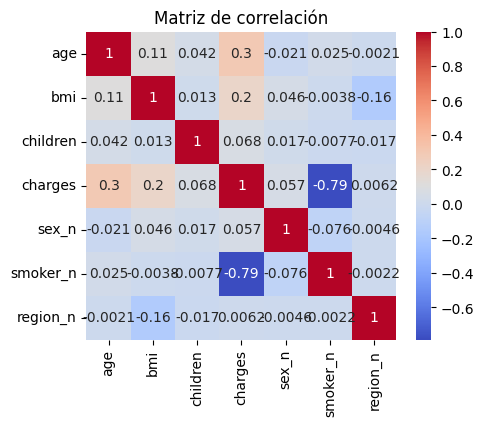

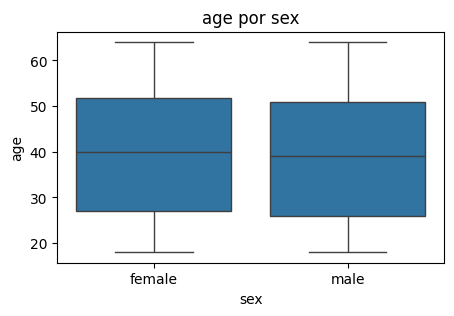

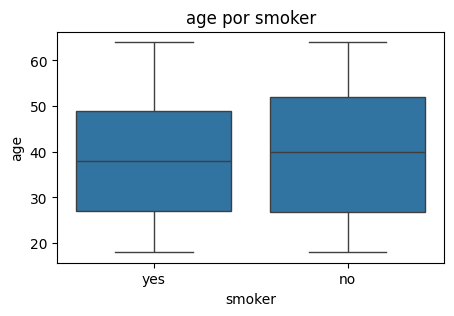

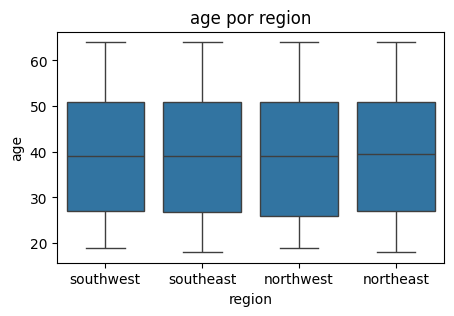

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
def correlation_analysis(df, categorical_to_numerical=None):
    """3.4 Análisis de correlaciones."""
    if categorical_to_numerical:
        for conversion in categorical_to_numerical:
            categorical_col = conversion['categorical_col']
            numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
            df[numerical_col] = pd.factorize(df[categorical_col])[0]
            transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in df[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
            ruta_json = os.path.join("../data/processed/Json", f"{numerical_col}_transformation_rules.json")
            os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
            with open(ruta_json, "w") as f:
                json.dump(transformation_rules, f)
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(5, 4))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()
def categorical_numerical_correlation(df):
    """Correlación entre variables categóricas y numéricas."""
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            plt.figure(figsize=(5, 3))
            sns.boxplot(data=df, x=categorical_col, y=numerical_cols[0])
            plt.title(f'{numerical_cols[0]} por {categorical_col}')
            plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")
categorical_to_numerical = [{'categorical_col': 'sex'}, {'categorical_col': 'smoker'}, {'categorical_col': 'region'}]
correlation_analysis(df, categorical_to_numerical)
categorical_numerical_correlation(df)

Conclusiones:Matriz de correlación:

La matriz de correlación muestra las relaciones entre todas las variables numéricas. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.
Boxplots de variables categóricas y numéricas:

Los gráficos de caja muestran cómo las variables numéricas varían según las categorías de las variables categóricas. Esto puede ayudar a identificar diferencias significativas entre las categorías.



### 3.5 Categórico-numérico

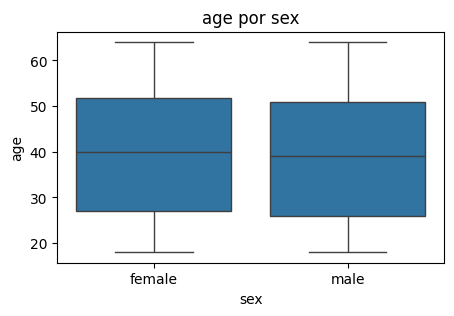

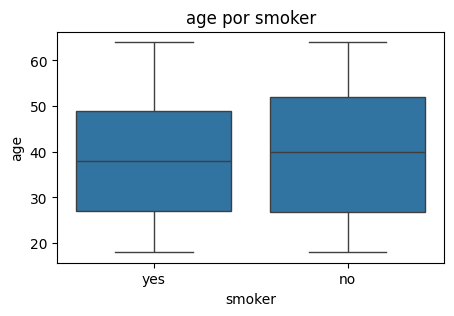

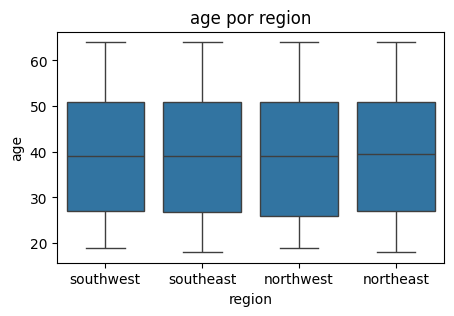

In [13]:
categorical_numerical_correlation(df)

Conclusiones:


Relación entre sex y charges:

Los gráficos de caja muestran que los costos médicos (charges) tienden a ser similares entre hombres y mujeres, sin diferencias significativas.
Relación entre smoker y charges:

Los gráficos de caja indican que los fumadores tienden a tener costos médicos significativamente más altos que los no fumadores, lo que sugiere que fumar está asociado con mayores gastos médicos.
Relación entre region y charges:

Los gráficos de caja muestran variaciones en los costos médicos según la región. Algunas regiones pueden tener costos médicos más altos, lo que podría estar relacionado con factores geográficos o socioeconómicos.

## 4. Análisis de toda la data en una

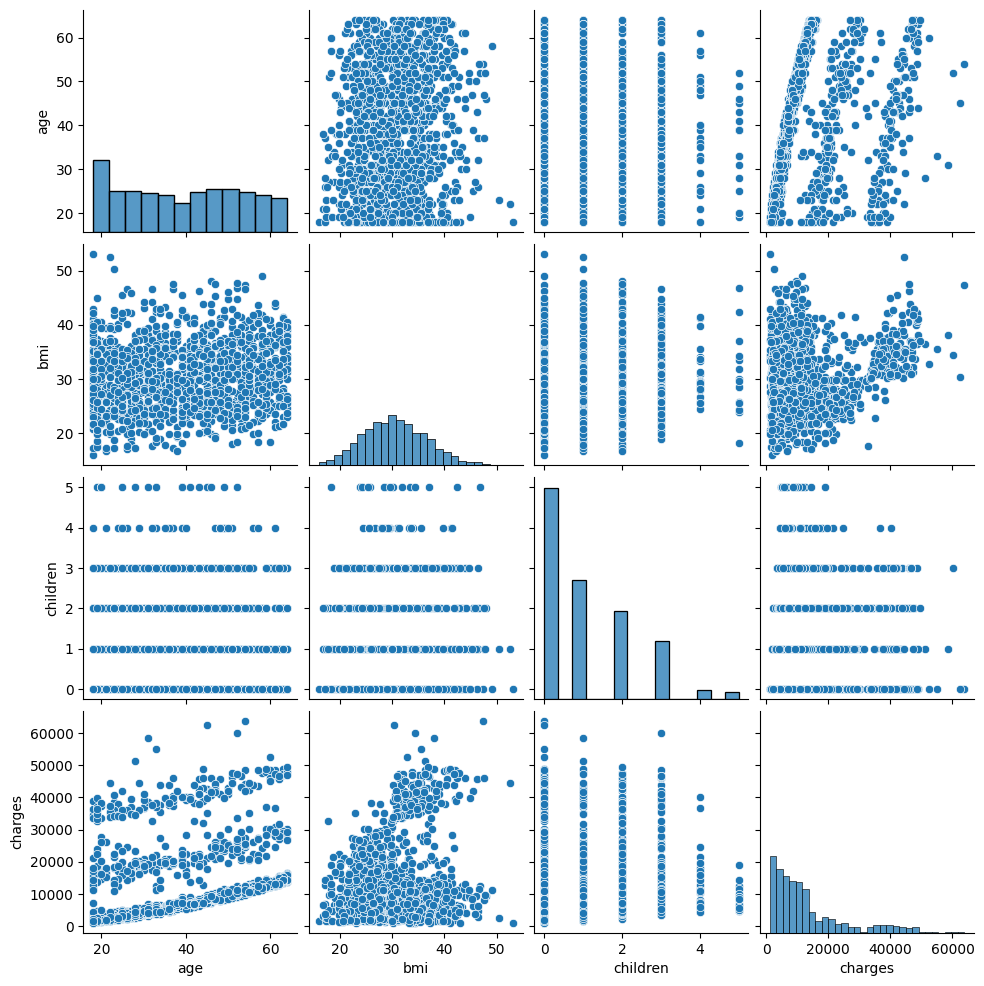

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
import seaborn as sns
import matplotlib.pyplot as plt 
def pairplot_analysis(df):
	numerical_cols = df.select_dtypes(include=['number']).columns
	sns.pairplot(df[numerical_cols])
	plt.show()
pairplot_analysis(df)


## 5. Feature Engineering

### 5.1 Análisis Outliers

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
def analyze_outliers(df):
    """5.1 Análisis Outliers."""
    df_con_outliers = df.copy()
    df_sin_outliers = df.copy()
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    num_cols = len(numerical_cols)
    rows = (num_cols + 4) // 5
    fig, axes = plt.subplots(rows, 5, figsize=(10, 3 * rows))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols):
        sns.boxplot(ax=axes[i], data=df, y=col)
        axes[i].set_title(col)
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    return df_sin_outliers, numerical_cols

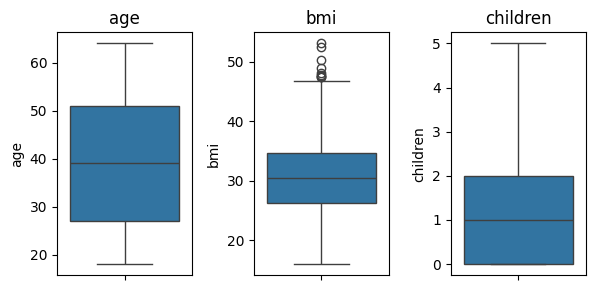

In [17]:
df_sin_outliers, numerical_cols = analyze_outliers(df)

In [18]:
def replace_outliers(df_sin_outliers, numerical_cols):
    """Reemplazar outliers."""
    def replace_outliers_column(column, df):
        colum_stats = df[column].describe()
        IQR = colum_stats["75%"] - colum_stats["25%"]
        lower_bound = colum_stats["25%"] - 1.5 * IQR
        upper_bound = colum_stats["75%"] + 1.5 * IQR
        if lower_bound < 0: lower_bound = min(df[column])
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
        return df.copy(), [lower_bound, upper_bound]

    outliers_dict = {}
    for column in numerical_cols:
        df_sin_outliers, limit_list = replace_outliers_column(column, df_sin_outliers)
        outliers_dict[column] = [float(limit) for limit in limit_list]
    ruta_json = os.path.join("../data/processed/Json", "outliers_dict.json")
    os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
    with open(ruta_json, "w") as f:
        json.dump(outliers_dict, f)
    print(outliers_dict)
    return df_sin_outliers

In [19]:
df_sin_outliers = replace_outliers(df_sin_outliers, numerical_cols)

{'age': [18.0, 87.0], 'bmi': [13.7, 47.290000000000006], 'children': [0.0, 5.0]}


### 5.2  Anáisis de valores faltantes

In [20]:
def handle_missing_values(df_sin_outliers):
    """5.2 Análisis de valores faltantes."""
    print("Valores faltantes por columna:")
    print(df_sin_outliers.isnull().sum())
    numerical_cols = df_sin_outliers.select_dtypes(include=['number']).columns.difference([target_column])
    categorical_cols = df_sin_outliers.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].median())
    for col in categorical_cols:
        df_sin_outliers[col] = df_sin_outliers[col].fillna(df_sin_outliers[col].mode()[0])
    print("\nValores faltantes después de la imputación:")
    print(df_sin_outliers.isnull().sum())
    return df_sin_outliers

In [21]:
handle_missing_values(df_sin_outliers)

Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Valores faltantes después de la imputación:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Conclusiones: 


Valores faltantes iniciales:

El código imprime la cantidad de valores faltantes por columna antes de la imputación. Esto ayuda a identificar qué columnas tienen datos faltantes y la magnitud del problema.
Imputación de valores faltantes:

Para las columnas numéricas, los valores faltantes se rellenan con la mediana de la columna. Esto es útil para mantener la distribución central de los datos sin ser afectado por valores extremos.
Para las columnas categóricas, los valores faltantes se rellenan con la moda (el valor más frecuente). Esto ayuda a mantener la consistencia de las categorías.
Valores faltantes después de la imputación:

El código imprime la cantidad de valores faltantes por columna después de la imputación. Esto confirma que todos los valores faltantes han sido tratados y que el DataFrame está completo.

### 5.3 Inferencia de nuevas caraterísticas

No hay columnas para aplicar inferencia de nuevas características

## 6. Feature Scalling

#### 6.0) DEFINIMOS Y LLAMAMOS A LAS FUNCIONES

In [176]:
num_variables = ['age', 'bmi', 'children','sex_n', 'smoker_n', 'region_n']

# Assign the original dataset to total_data_con_outliers
total_data_con_outliers = df

# Remove outliers from total_data_con_outliers to create total_data_sin_outliers
def remove_outliers(df, columns):
	"""Remove outliers using the IQR method."""
	df_clean = df.copy()
	for col in columns:
		Q1 = df_clean[col].quantile(0.25)
		Q3 = df_clean[col].quantile(0.75)
		IQR = Q3 - Q1
		lower_bound = Q1 - 1.5 * IQR
		upper_bound = Q3 + 1.5 * IQR
		df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
	return df_clean

total_data_sin_outliers = remove_outliers(total_data_con_outliers, ['age', 'bmi', 'charges'])

X_con_outliers = total_data_con_outliers.drop("charges", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_con_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,46,19.95,2,0,1,2
1285,47,24.32,0,0,1,3
1142,52,24.86,0,0,1,1
969,39,34.32,5,0,1,1
486,54,21.47,3,0,1,2


Archivo JSON creado: ../data/processed/sex_n_transformation_rules.json
Archivo JSON creado: ../data/processed/smoker_n_transformation_rules.json
Archivo JSON creado: ../data/processed/region_n_transformation_rules.json


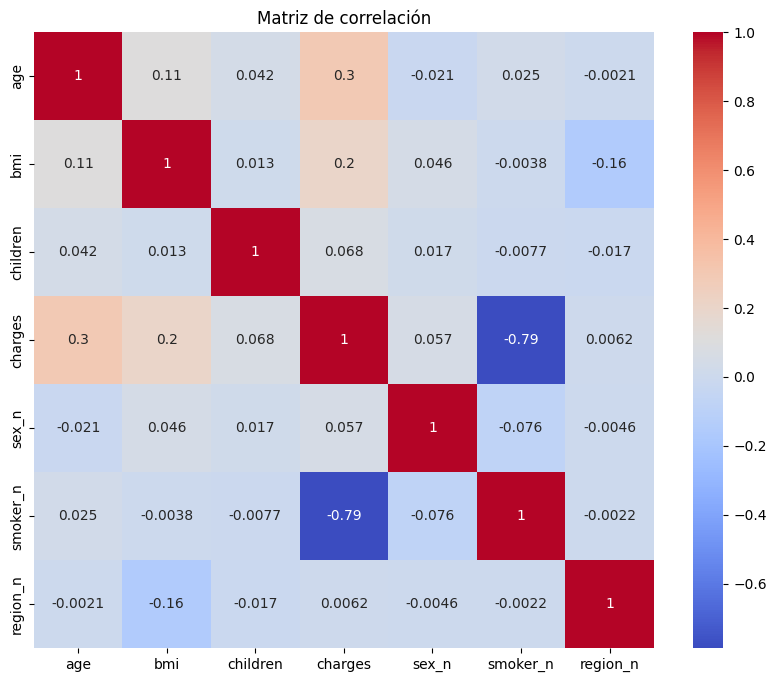

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
def save_transformation_rules(df, categorical_to_numerical, ruta_guardado):
    """Guardar reglas de transformación en archivos JSON."""
    for conversion in categorical_to_numerical:
        categorical_col = conversion['categorical_col']
        numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
        df[numerical_col] = pd.factorize(df[categorical_col])[0]
        transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in df[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
        ruta_json = os.path.join(ruta_guardado, f"{numerical_col}_transformation_rules.json")
        os.makedirs(os.path.dirname(ruta_json), exist_ok=True) # Crea el directorio si no existe
        with open(ruta_json, "w") as f:
            json.dump(transformation_rules, f)
        print(f"Archivo JSON creado: {ruta_json}")
def correlation_analysis(df, categorical_to_numerical=None, ruta_guardado="../data/processed/"):
    """3.4 Análisis de correlaciones."""
    if categorical_to_numerical:
        save_transformation_rules(df, categorical_to_numerical, ruta_guardado)
    numerical_df = df.select_dtypes(include='number')
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()
def categorical_numerical_correlation(df):
    """Correlación entre variables categóricas y numéricas."""
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include(['object']).columns)
    if len(numerical_cols) > 0 and len(categorical_cols) > 0:
        for categorical_col in categorical_cols:
            plt.figure(figsize=(10, 6))
            for numerical_col in numerical_cols:
                sns.boxplot(x=categorical_col, y=numerical_col, data=df)
                plt.title(f'{numerical_col} por {categorical_col}')
                plt.show()
    else:
        print("No hay suficientes columnas numéricas y/o categóricas para generar los gráficos de correlación.")
def feature_scaling(df, df_sin_outliers, ruta_guardado="../data/processed/"):
    """6. Feature Scaling."""
    numerical_cols = df.select_dtypes(include=['number']).columns.difference([target_column])
    X_con_outliers = df.drop(target_column, axis=1)[numerical_cols]
    X_sin_outliers = df_sin_outliers.drop(target_column, axis=1)[numerical_cols]
    y = df[target_column]
    X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size=0.2, random_state=42)
    X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size=0.2, random_state=42)
    X_train_con_outliers.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers.xlsx"), index=False)
    X_train_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers.xlsx"), index=False)
    X_test_con_outliers.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers.xlsx"), index=False)
    X_test_sin_outliers.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers.xlsx"), index=False)
    y_train.to_excel(os.path.join(ruta_guardado, "y_train.xlsx"), index=False)
    y_test.to_excel(os.path.join(ruta_guardado, "y_test.xlsx"), index=False)
    print("Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx")
    return X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols
target_column = 'charges'
categorical_to_numerical = [
    {'categorical_col': 'sex', 'numerical_col': 'sex_n'},
    {'categorical_col': 'smoker', 'numerical_col': 'smoker_n'},
    {'categorical_col': 'region', 'numerical_col': 'region_n'}
]
for conversion in categorical_to_numerical:
    categorical_col = conversion['categorical_col']
    numerical_col = conversion['numerical_col']
    if categorical_col in df.columns and numerical_col not in df.columns:
        df[numerical_col] = pd.factorize(df[categorical_col])[0]
# Ensure the required columns are present in the DataFrame
missing_columns = [col['numerical_col'] for col in categorical_to_numerical if col['numerical_col'] not in df.columns]
if missing_columns:
    raise KeyError(f"Columns {missing_columns} are missing in the DataFrame. Ensure they are created before proceeding.")
required_columns = ['region_n', 'sex_n', 'smoker_n']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Columns {missing_columns} are missing in the DataFrame. Ensure they are created before proceeding.")
correlation_analysis(df, categorical_to_numerical)

### 6.1 Normalización

Archivo JSON creado: ../data/processed/sex_n_transformation_rules.json
Archivo JSON creado: ../data/processed/smoker_n_transformation_rules.json
Archivo JSON creado: ../data/processed/region_n_transformation_rules.json


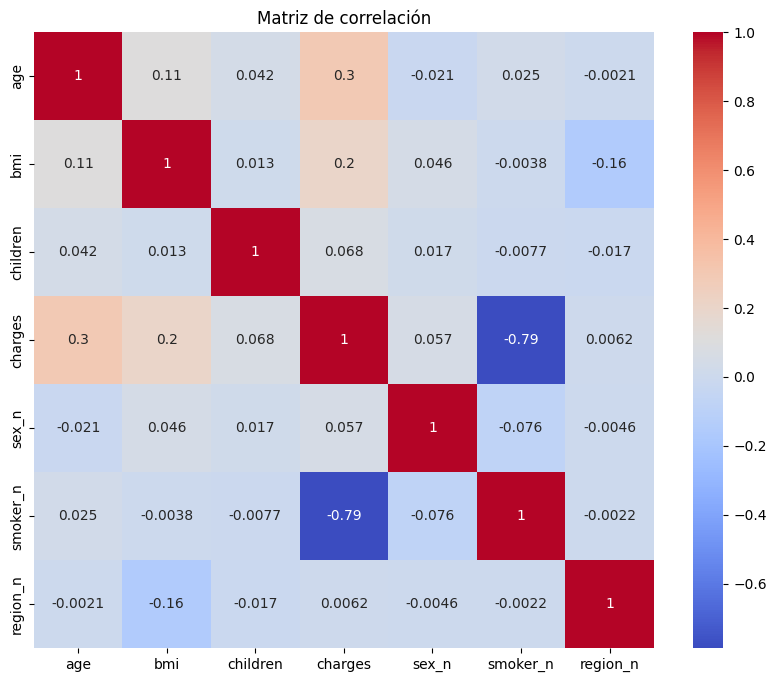

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
def normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_modelo="../models/"):
    """Normalizar datos y guardar normalizadores."""
    os.makedirs(ruta_modelo, exist_ok=True) 
    normalizador_con_outliers = StandardScaler()
    normalizador_con_outliers.fit(X_train_con_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_con_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_con_outliers, file)
    X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
    X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
    
    normalizador_sin_outliers = StandardScaler()
    normalizador_sin_outliers.fit(X_train_sin_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_sin_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_sin_outliers, file)
    X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
    X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
    
    print("Archivos de normalizadores creados: normalizador_con_outliers.pkl, normalizador_sin_outliers.pkl")
    return X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm
target_column = 'charges'
categorical_to_numerical = [{'categorical_col': 'sex'}, {'categorical_col': 'smoker'}, {'categorical_col': 'region'}]
correlation_analysis(df, categorical_to_numerical)

### 6.2 NORMALIZADOR - Escalado Mínimo-Máximo

In [179]:
def normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols, ruta_guardado="../data/processed/", ruta_modelo="../models/"):
    """6.1 Normalización."""
    normalizador_con_outliers = StandardScaler()
    normalizador_con_outliers.fit(X_train_con_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_con_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_con_outliers, file)
    X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
    X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=numerical_cols)
    X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
    X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=numerical_cols)
    X_train_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_con_outliers_norm.xlsx"), index=False)
    X_test_con_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_con_outliers_norm.xlsx"), index=False)
    normalizador_sin_outliers = StandardScaler()
    normalizador_sin_outliers.fit(X_train_sin_outliers)
    with open(os.path.join(ruta_modelo, "normalizador_sin_outliers.pkl"), "wb") as file:
        pickle.dump(normalizador_sin_outliers, file)
    X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
    X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=numerical_cols)
    X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
    X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=numerical_cols)
    X_train_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_train_sin_outliers_norm.xlsx"), index=False)
    X_test_sin_outliers_norm.to_excel(os.path.join(ruta_guardado, "X_test_sin_outliers_norm.xlsx"), index=False)
    print("Archivos creados: X_train_con_outliers_norm.xlsx, X_test_con_outliers_norm.xlsx, X_train_sin_outliers_norm.xlsx, X_test_sin_outliers_norm.xlsx")
    return X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm

In [180]:
X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
196,-0.014694,0.366188,-0.894124,-1.015064,0.509327,-1.338375
1209,1.406276,1.069143,-0.063472,0.985160,0.509327,-1.338375
353,-0.440985,0.765892,-0.894124,0.985160,0.509327,1.366835
461,0.198452,-0.091550,-0.894124,0.985160,-1.963374,-1.338375
629,0.340549,1.371578,-0.894124,-1.015064,-1.963374,0.465098


## 7. Feature Selection

#### 7.1 Selección de Características

In [181]:
def f_classif(X,y):
    (SelectKBest(f_classif, k=5))
def feature_selection(X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm, X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal, y_train, y_test, ruta_modelo = "../models/"):
    """7. Feature Selection."""
    """ 7.1 Selección de características"""
    try:
        feature_selection_k = int(input("10"))
        dataset_name = input("Ingrese el nombre del dataset para entrenar el modelo (X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm, X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal): ")
        if dataset_name == "X_train_con_outliers_norm":
            feature_selection_dataset = X_train_con_outliers_norm
        elif dataset_name == "X_train_sin_outliers_norm":
            feature_selection_dataset = X_train_sin_outliers_norm
        elif dataset_name == "X_test_con_outliers_norm":
            feature_selection_dataset = X_test_con_outliers_norm
        elif dataset_name == "X_test_sin_outliers_norm":
            feature_selection_dataset = X_test_sin_outliers_norm
        elif dataset_name == "X_train_con_outliers_scal":
            feature_selection_dataset = X_train_con_outliers_scal
        elif dataset_name == "X_train_sin_outliers_scal":
            feature_selection_dataset = X_train_sin_outliers_scal
        elif dataset_name == "X_test_con_outliers_scal":
            feature_selection_dataset = X_test_con_outliers_scal
        elif dataset_name == "X_test_sin_outliers_scal":
            feature_selection_dataset = X_test_sin_outliers_scal
        else:
            raise ValueError("Nombre de dataset no válido.")
    except ValueError as e:
        print(f"Error: {e}")
        return None, None
    modelo_seleccion = SelectKBest(f_classif, k=feature_selection_k)
    modelo_seleccion.fit(feature_selection_dataset, y_train)
    ix = modelo_seleccion.get_support()
    x_train_sel = pd.DataFrame(modelo_seleccion.transform(feature_selection_dataset), columns=feature_selection_dataset.columns.values[ix])
    x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_sin_outliers_scal), columns=X_test_sin_outliers_scal.columns.values[ix])
    x_train_sel[target_column] = list(y_train)
    x_test_sel[target_column] = list(y_test)
    ruta_json = os.path.join("../data/processed/Json", f"featureselection_k_{feature_selection_k}.json")
    os.makedirs(os.path.dirname(ruta_json), exist_ok=True)
    with open(ruta_json, "w") as f:
        json.dump(list(x_train_sel.columns), f)
    x_train_sel.to_csv(os.path.join(ruta_modelo, "x_train_sel.csv"), index=False)
    x_test_sel.to_csv(os.path.join(ruta_modelo, "x_test_sel.csv"), index=False)
    print(f"Características seleccionadas: {list(x_train_sel.columns)}")
    return x_train_sel, x_test_sel

#### 7.2 Quito variables que no son importantes para mi modelo y entreno el modelo sin esas

##### variables que puedo eliminar del modelo segun la importancia del mismo

    Feature  Importance
4  smoker_n    0.619903
1       bmi    0.209517
0       age    0.130859
2  children    0.019753
5  region_n    0.014006
3     sex_n    0.005962


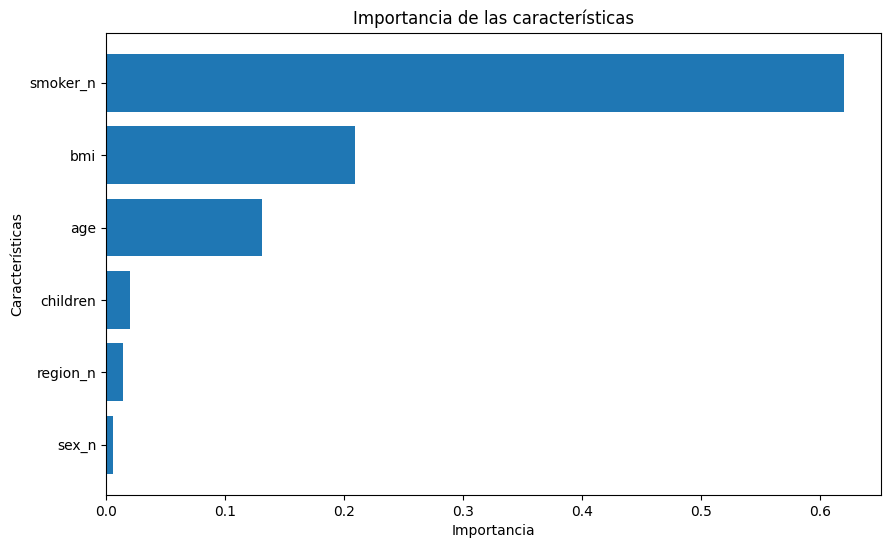

In [182]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Escalar las variables numéricas
num_variables = df.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Random Forest para calcular la importancia de las características
X = df_scal.drop(columns=["charges"])  # Suponiendo que "charges" es la variable objetivo
y = df_scal["charges"]  # Variable objetivo
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar los resultados
print(importance_df)
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las características")
plt.gca().invert_yaxis()
plt.show()

como se ve de la grafica, el sexo, la region y si tiene hijos no es muy relevante a la hora de calcular el seguro médico, me las podría cargar 

In [183]:
X = df_scal.drop("charges", axis=1)
y = df_scal["charges"]
low_importance_features = ["sex_n", "region_n", "children"]  
X_reduced = X.drop(columns=low_importance_features)
model_reduced = RandomForestRegressor(random_state=42)
model_reduced.fit(X_reduced, y)
print("Modelo entrenado con variables reducidas.")

Modelo entrenado con variables reducidas.


#### 7.3 Separo variables para train y para test

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### 7.4 Normalizo ahora con todo tratado

guardo el modelo

In [185]:
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Save the scalers to files
joblib.dump(standard_scaler, 'standard_scaler.pkl')
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')

# Load the scalers from files
standard_scaler = joblib.load('standard_scaler.pkl')
minmax_scaler = joblib.load('minmax_scaler.pkl')

In [186]:
import os
import pandas as pd

BASE_PATH = "data/models"  # Update this to the correct local directory path

# Check if the base directory exists
if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH, exist_ok=True)
    print(f"The directory '{BASE_PATH}' did not exist and has been created.")

TRAIN_PATHS = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]
TRAIN_DATASETS = []
for path in TRAIN_PATHS:
    full_path = os.path.join(BASE_PATH, path)
    if os.path.exists(full_path):
        try:
            TRAIN_DATASETS.append(pd.read_excel(full_path))
        except Exception as e:
            print(f"Error reading file {full_path}: {e}")
    else:
        print(f"File not found: {full_path}")

TEST_PATHS = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]
TEST_DATASETS = []
for path in TEST_PATHS:
    full_path = os.path.join(BASE_PATH, path)
    if os.path.exists(full_path):
        try:
            TEST_DATASETS.append(pd.read_excel(full_path))
        except Exception as e:
            print(f"Error reading file {full_path}: {e}")
   

File not found: data/models/X_train_con_outliers.xlsx
File not found: data/models/X_train_sin_outliers.xlsx
File not found: data/models/X_train_con_outliers_norm.xlsx
File not found: data/models/X_train_sin_outliers_norm.xlsx
File not found: data/models/X_train_con_outliers_scal.xlsx
File not found: data/models/X_train_sin_outliers_scal.xlsx


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
X = df_scal.drop("charges", axis=1)  # Variables independientes
y = df_scal["charges"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Selección de características con SelectKBest y chi2
selection_model = SelectKBest(f_regression, k=5)  # Seleccionar las 5 mejores características
selection_model.fit(X_train, y_train)  # Ajustar el modelo de selección
# Obtener las características seleccionadas
ix = selection_model.get_support()  # Arreglo booleano de características seleccionadas
# Transformar los conjuntos de datos para incluir solo las características seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])
# Mostrar las primeras filas del conjunto de entrenamiento reducido
X_train_sel.head()

,age,bmi,children,sex_n,smoker_n
0,0.456522,0.453054,0.0,0.0,1.0
1,0.891304,0.568738,0.2,1.0,1.0
2,0.326087,0.518832,0.0,1.0,1.0
3,0.521739,0.377724,0.0,1.0,0.0
4,0.565217,0.618510,0.0,0.0,0.0


In [188]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("X_train_sel.csv", index=False)
X_test_sel.to_csv("X_test_sel.csv", index=False)

## 8. MODELOS DE REGRESION LINEAL

#### PASO 1) leo conjuto de datos procesaedo - aqui lo que voy a hacer es entrenar el modelo TRAIN 

In [189]:
# 1. Definir rutas y nombres de archivos
import pandas as pd

BASE_PATH = "../data/processed"
TRAIN_FILES = [
    "X_train_con_outliers.xlsx",
    "X_train_sin_outliers.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_con_outliers_norm.xlsx",
    "X_train_sin_outliers_norm.xlsx",
    "X_train_con_outliers_scal.xlsx",
    "X_train_sin_outliers_scal.xlsx"
]
TEST_FILES = [
    "X_test_con_outliers.xlsx",
    "X_test_sin_outliers.xlsx",
    "X_test_con_outliers_norm.xlsx",
    "X_test_sin_outliers_norm.xlsx",
    "X_test_con_outliers_scal.xlsx",
    "X_test_sin_outliers_scal.xlsx"
]




In [190]:
def load_data(base_path, filenames):
    """Load Excel files and return a list of DataFrames."""
    dataframes = []
    for file in filenames:
        file_path = os.path.join(base_path, file)
        print(f"Loading file: {file_path}")
        dataframes.append(pd.read_excel(file_path))
    for i, df in enumerate(dataframes):
        print(f"Loaded: {filenames[i]}, Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    return dataframes

In [191]:
# 2. Cargar datos
def load_data(base_path, filenames):
    """Load Excel files and return a list of DataFrames."""
    dataframes = [pd.read_excel(os.path.join(base_path, file)) for file in filenames]
    for i, df in enumerate(dataframes):
        print(f"Loaded: {filenames[i]}, Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    return dataframes

X_train_list = load_data(BASE_PATH, TRAIN_FILES)
X_test_list = load_data(BASE_PATH, TEST_FILES)
y_train = pd.read_excel(os.path.join(BASE_PATH, "y_train.xlsx"))
y_test = pd.read_excel(os.path.join(BASE_PATH, "y_test.xlsx"))

print("\nDatos de y_train:", y_train.shape)
print("Datos de y_test:", y_test.shape)

Loaded: X_train_con_outliers.xlsx, Rows: 1070, Columns: 6
Loaded: X_train_sin_outliers.xlsx, Rows: 952, Columns: 6
Loaded: X_train_con_outliers_norm.xlsx, Rows: 1204, Columns: 6
Loaded: X_train_con_outliers_norm.xlsx, Rows: 1204, Columns: 6
Loaded: X_train_sin_outliers_norm.xlsx, Rows: 1204, Columns: 6
Loaded: X_train_con_outliers_scal.xlsx, Rows: 1070, Columns: 6
Loaded: X_train_sin_outliers_scal.xlsx, Rows: 1070, Columns: 6
Loaded: X_test_con_outliers.xlsx, Rows: 268, Columns: 6
Loaded: X_test_sin_outliers.xlsx, Rows: 239, Columns: 6
Loaded: X_test_con_outliers_norm.xlsx, Rows: 134, Columns: 6
Loaded: X_test_sin_outliers_norm.xlsx, Rows: 134, Columns: 6
Loaded: X_test_con_outliers_scal.xlsx, Rows: 268, Columns: 6
Loaded: X_test_sin_outliers_scal.xlsx, Rows: 268, Columns: 6

Datos de y_train: (1070, 1)
Datos de y_test: (268, 1)


In [192]:
# 3. Entrenar y evaluar modelos
results = []
for i, (X_train, X_test) in enumerate(zip(X_train_list, X_test_list)):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "train_r2": train_r2,
        "test_r2": test_r2 })

NameError: name 'LinearRegression' is not defined

In [ ]:
# 3. Entrenar y evaluar modelos
results = []
for i, (X_train, X_test) in enumerate(zip(X_train_list, X_test_list)):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "train_r2": train_r2,
        "test_r2": test_r2 })
    

NameError: name 'X_test_list' is not defined

In [ ]:
# 4. Mostrar resumen de resultados
print("\nResumen de todos los modelos:")
for i, result in enumerate(results):
    print(f"Modelo {i+1}:")
    print(f"  Train: {result['train_r2']:.4f}")
    print(f"  Test: {result['test_r2']:.4f}")


Resumen de todos los modelos:


In [ ]:
import pandas as pd

# Save the DataFrames to CSV files if they don't already exist
X_train_sel.to_csv("X_train_sel.csv", index=False)
X_test_sel.to_csv("X_test_sel.csv", index=False)

# Read the CSV files
train_data = pd.read_csv("X_train_sel.csv")
test_data = pd.read_csv("X_test_sel.csv")

# Display the first few rows of the training data
train_data.head()

,age,bmi,children,sex_n,smoker_n,charges
0,0.456522,0.453054,0.0,0.0,1.0,0.072274
1,0.891304,0.568738,0.2,1.0,1.0,0.179179
2,0.326087,0.518832,0.0,1.0,1.0,0.180100
3,0.521739,0.377724,0.0,1.0,0.0,0.335557
4,0.565217,0.618510,0.0,0.0,0.0,0.668197


Ahora utilizo test para probar como de bueno es mi modelo según todo el tratamiento de datos y según lo he entrenado predictoreas de caracteristicas

In [ ]:
train_data = pd.read_csv("X_train_sel.csv")

# TRAIN
X_train = train_data.drop(["charges"], axis=1)  # Drop the target column
y_train = train_data["charges"]  # Target column

# TEST
X_test = test_data.drop(["charges"], axis=1)  # Drop the target column
y_test = test_data["charges"]  # Target column


### PASO 2) PARAMETRIZACIÓN Y ENTRENAMINENTO DEL MODELO (inicializacion y entrenamiento del modelo)

In [ ]:
from sklearn.linear_model import LogisticRegression # AQUI LE ESTOYETINEEDNO LA REGRESION LINEAL el tiempo de entrenamiento varía según lo grande que sea mi modelo...

# Convert continuous target variable to discrete classes
y_train_discrete = (y_train > 0.5).astype(int)  # Example: Convert to binary classes (0 or 1)

model = LogisticRegression() # INICIALIZACION DEL modelo. aqui internamente podria incluir los hiperparametros, pero no lo hago porque no es necesario
model.fit(X_train, y_train_discrete) # APLICO SOBRE EL TRAINNN, entrenamiento del modelo

LogisticRegression()

### PASO 3) PREDICCION Y COMPARACION

In [ ]:
y_pred = model.predict(X_test)
y_pred # esto me va a dr como resultados ceros y unos porque es un modelo de regresion lineal, no puedo comparar en realidad en este caso, por eso el siguiente paso es ver el acuracy que me da mas info

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

# Convert y_test to binary values
y_test_binary = (y_test > 0.9999).astype(int)

# Calculate accuracy score
accuracy_score(y_test_binary, y_pred)

0.9029850746268657

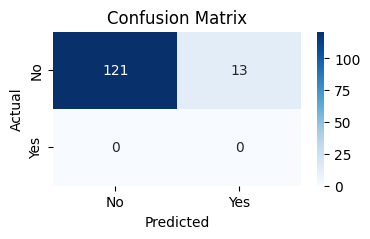

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import confusion_matrix
siono_cm = confusion_matrix(y_test_binary, y_pred)
# dibujo la martiz
cm_df = pd.DataFrame(siono_cm, index=["No", "Yes"], columns=["No", "Yes"])
plt.figure(figsize=(4,2))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

falso negativo y verdadero positivo = 121 veces dijo que no y acerto, y todas las veces dijo que si y acertó. Hubo 13 veces que dijo no y que era si..

# OPTIMIZACION DEL MODELO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Ensure the target variable is discrete
y_train_discrete = (y_train > 0.5).astype(int)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
	'n_estimators': [50, 100, 200],
	'max_depth': [None, 10, 20],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid.fit(X_train, y_train_discrete)  # Train the model with the training data

# Display the best hyperparameters found
print("Mejores hiperparámetros:", grid.best_params_)

# Display the best accuracy score obtained
print("Mejor precisión:", grid.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor precisión: 0.9908609958506224


In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
# Convert continuous target variable to discrete classes
y_train_discrete = (y_train > 0.5).astype(int)  # Example: Convert to binary classes (0 or 1)

# Train the logistic regression model
model = LogisticRegression(C=0.1, penalty="l2", solver="liblinear")
model.fit(X_train, y_train_discrete)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(y_test_binary, y_pred)

0.9626865671641791

In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))